# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [206]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
#print data.head()  # print the first 5 rows
#print data[0,1]

Dataset has 440 rows, 6 columns


##Feature Transformation

In [4]:
from IPython.display import display
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

In PCA, we would expect to be able project the dataset into 2 orthogonal dimensions that maximizes variance.  This is known as dimensionality reduction.  The main PC, the new x-axis, will be the direction with the most variation.  Then the new y-axis will be the direction of the next highest varying component.  In this case Fresh and Grocery have the highest variance.

In ICA, we seek to break up the full dataset into a linear combination of maximally independent components.  So, the vectors that appear in the ICA can be used to help separate signals which have been mixed together into one source.  We would expect to have each vector maximizing uncorrelation.  We may then expect to see each vector attempting to maximize the independence of a single feature such as Fresh in one vector.  Milk in another vector, etc.

###PCA

In [6]:
X = np.array(data)

In [7]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)   #changed n_components to 2
pca.fit(X)


# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The variance goes from about 0.45 to 0.4 til under 0.10 

I would choose two dimensions for this analysis, since the other components are much, much smaller compared to the first two components.  Most of the information is contained in the first two components so it is not too bad to drop the other components.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

These dimensions are chosen to represent the the data in the direction that has the most variation.  Any dimension that does not have much variacation can be dropped to simplify the problem.  Therefore, instead of having to use six dimentions, we can just focus on a two dimensional problem.

Here we see that in the first vector:  

[**-0.97653685** -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]

We see to see how far each feature deviates from 0.  Any number above 0.5 is considered "large".  In other words we find the absolute value of each feature in the vector and see which number is largest and greater than a half.  Then that means the component is highly correlated with that one feature.  We see that the first feature varies most abs(-0.976) is very close to 1.  So the first component is most HEAVILY correlated with the first feature which is Fresh.

In the second vector: 
[-0.11061386  **0.51580216**  **0.76460638** -0.01872345  0.36535076  0.05707921]

We see that the largest two numbers in the vector are 0.5158 and 0.7646, which means it is strongly correlated with Grocery and Milk.

From this information we can see the data set is correlated to the first three features:  Fresh, Grocery and Milk.
We can then focus on these features contained in the first two componenets of PCA.

###ICA

In [351]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
ica = FastICA()
ica.fit(X_scaled)

# Print the independent components
print ica.components_

[[ 0.00488631  0.00161111  0.00552695  0.00264651 -0.00231735 -0.05097918]
 [-0.05026348  0.00652625  0.00742488  0.00321871 -0.01144273  0.00269695]
 [-0.01092294 -0.00107296  0.00729538  0.05405027 -0.00253614 -0.01664798]
 [ 0.00255369 -0.01261862  0.0686431   0.00145982 -0.01302458 -0.00530594]
 [-0.00196088 -0.07252663  0.05565722  0.00173207 -0.01631662  0.01700662]
 [-0.0033637   0.01812435  0.10972564 -0.0072128  -0.13356603 -0.01597146]]


/Users/jonlee-imac/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

Each component found in the ICA decomposition represents a weight (W).  The inverse of (W) cooresponds to the mixing matrix (A) in the equation x = As.  These components can be used in the equation  s = Wx to determine each separate source.

[-0.05022604  0.0063254   0.00587226  0.00328736 -0.00975799  0.00294779]
This vector seems to coorespond to Fresh.  While the features with negative sign are anti-correlated with the exception of detergent which is minimally correlated

 [ 0.0109308   0.00103395 -0.00735012 -0.05404914  0.00264869  0.01676746]
 This vector seems to coorespond most to Frozen, while the others are anti-ncorrelated.  Grocery is minimally correlated with Frozen.
 
 [ 0.00488118  0.00161832  0.00570932  0.00253164 -0.00243258 -0.05096563]
 This vector cooresponds most to delicatessens
 
 [-0.00266802  0.01395715 -0.06054307 -0.002024    0.00331437  0.00403117]
 This vector cooresponds most to Grocery.
 
  [ 0.003801   -0.01693166 -0.11473254  0.00708561  0.13435588  0.01615172]
  This vector cooresponds most to detergents and paper and is highly uncorrelated with groceries.
  
 [-0.00193808 -0.07258782  0.0551189   0.00176723 -0.01574346  0.01706779]
 This vector cooresponds most to Milk.
 
 So we can see that in each of these vectors there is one feature that dominates so that it can be be "picked out".  

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

Some advantages of K-means clustering is first, this algorithm is highly scalable.  So, it can be used for both small and large datasets.  It is also used as a general-purpose algorithm.  In other words, when in doubt, you can't go wrong with choosing K-means.  However, note that in this case we are doing "hard assignment" of each data into their respective cluster.

The main advantage of GMM over KMeans is the abiity to do "soft assignments".  We may not always be 100% sure that a data point will absolutely 100% belong into one cluster.  We may be able to say that it has 60% chance it belows in cluster 1.  Another 30% chance it belongs in cluster 2.  And 10% chance it belongs in cluster 3.

I believe that K-means is more suitable for this application because mainly because of scalability.  You will always get more and more customers.  And this means there will be more and more data.  And if we want to keep comparing apples to apples, we should stick to the same algorithm from both smaller and large datasets.  However, it is pointed out that if this were true, we should be applying the K-means for all cases which is not always pratical.

------------------ Answer Updated ----------------------------------

So, let's revisit the situation.  When we take a look at the data as a simple scatter plot below, there is no clear boundary between  clusters.  It just looks like a lump of points situated at the bottom right corner.  So, if we were to use hard clustering we are being too confident in our categorizing since we cannot guarantee (especially near the borders of the clusters) that, 100%, a borderline customer is a restaurant when perhaps it is a grocery store or retail outlet.  Therefore, in this case, GMM, which is better for soft-clustering should be used since the membership is very fuzzy.  Some of these customers (again, especially near the boundaries) may belong in a different cluster since there are no clear (or hard) boundary between the clusters.  By stating, clear boundary, I mean there is not much "white space" between the groups of blue dots.  Therefore, let us also explore the GMM in more detail below the previous work on K-means.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [326]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [327]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #changed n_components to 2
pca.fit(X)
reduced_data = pca.fit_transform(X)
#print reduced_data[:20]  # print upto 10 elements

#print reduced_data[200:250]
#print reduced_data[239]

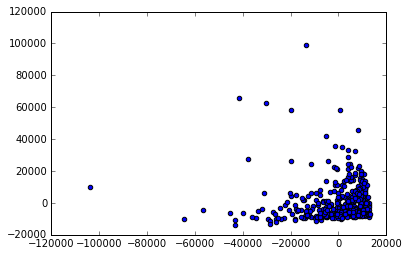

In [328]:
plt.scatter(reduced_data[:, 0],reduced_data[:, 1])
plt.show()

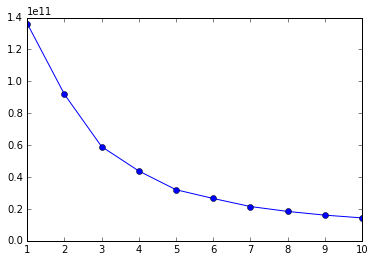

In [329]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3)
clusters4 = KMeans(n_clusters=4)
clusters5 = KMeans(n_clusters=5)
clusters6 = KMeans(n_clusters=6)
clusters7 = KMeans(n_clusters=6)
clusters.fit(reduced_data)
clusters4.fit(reduced_data)
clusters5.fit(reduced_data)
clusters6.fit(reduced_data)
clusters7.fit(reduced_data)

# elbow method to find optimum cluster point
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(reduced_data)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11),distortions,marker='o')

# Here we can see around 3 it increses pretty rapidly 

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


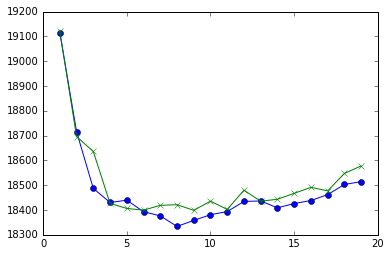

In [330]:
clusters_gmm = GMM(n_components=3)
clusters4_gmm = GMM(n_components=4)
clusters5_gmm = GMM(n_components=5)
clusters6_gmm = GMM(n_components=6)
clusters7_gmm = GMM(n_components=7)
clusters8_gmm = GMM(n_components=8)
clusters9_gmm = GMM(n_components=9)

clusters_gmm.fit(reduced_data)
clusters4_gmm.fit(reduced_data)
clusters5_gmm.fit(reduced_data)
clusters6_gmm.fit(reduced_data)
clusters7_gmm.fit(reduced_data)
clusters8_gmm.fit(reduced_data)

clusters9_gmm.fit(reduced_data)
print clusters_gmm

# instead of elbow method let us use BIC this time
bic_gmm = []
for i in range(1,20):
    gm = GMM(n_components=i)
    gm.fit(reduced_data)
    bic_gmm.append(gm.bic(reduced_data))
    
plt.plot(range(1,20),bic_gmm,marker='o')


bic_gmm = []
for i in range(1,20):
    gm = GMM(n_components=i,covariance_type='full',)
    gm.fit(reduced_data)
    bic_gmm.append(gm.bic(reduced_data))
    
plt.plot(range(1,20),bic_gmm,marker='x')

# looks like in this case 8 clusters has the lowest score
# although not shown here I also tested the tied,spherical and full models and they performed worse comapred to diag

In [316]:
## constant through different cluster tests
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.

xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))


## need to change this section for different clusters
# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = clusters4.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = clusters5.predict(np.c_[xx.ravel(), yy.ravel()])
Z6 = clusters6.predict(np.c_[xx.ravel(), yy.ravel()])
Z7 = clusters7.predict(np.c_[xx.ravel(), yy.ravel()])

ZG = clusters_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG4 = clusters4_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG5 = clusters5_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG6 = clusters6_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG7 = clusters7_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG8 = clusters8_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
ZG9 = clusters9_gmm.predict(np.c_[xx.ravel(), yy.ravel()])

# re-added this line so that there won't be an error from the 
# previous experiment.  It's either this or i can delete the whole section
# but that might cause some other error
Z_gmm = clusters_gmm.predict(np.c_[xx.ravel(), yy.ravel()])

# test zone
print np.c_[xx.ravel(), yy.ravel()][Z5==0].shape
print np.c_[xx.ravel(), yy.ravel()][Z4==0,1].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==1,0].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==1,1].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==2,0].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==2,1].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==3,1].shape
print np.c_[xx.ravel(), yy.ravel()][Z5==4,1].shape


(44751, 2)
(32266,)
(77898,)
(77898,)
(332567,)
(332567,)
(20553,)
(524231,)


In [331]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
centroids4 = clusters4.cluster_centers_
centroids5 = clusters5.cluster_centers_
centroids6 = clusters6.cluster_centers_
centroids7 = clusters7.cluster_centers_

centroids_gmm = clusters_gmm.means_
centroids4_gmm = clusters4_gmm.means_
centroids5_gmm = clusters5_gmm.means_
centroids6_gmm = clusters6_gmm.means_
centroids7_gmm = clusters7_gmm.means_
centroids8_gmm = clusters8_gmm.means_
centroids9_gmm = clusters9_gmm.means_

#centroidso = pca.inverse_transform(centroids)
centroids_gmm = clusters_gmm.means_
print centroids
print centroids_gmm

[[-24220.71188261  -4364.45560022]
 [  4114.95375632  -3081.03219608]
 [  1339.44615464  25546.49074629]]
[[  6987.95079141   4249.82914044]
 [   269.05318679  -6506.88683442]
 [-17879.18623839  10122.79246625]]


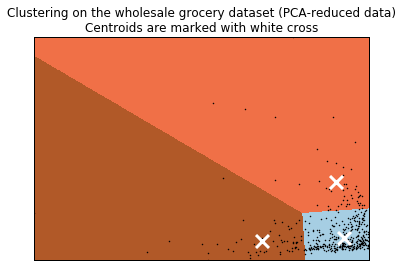

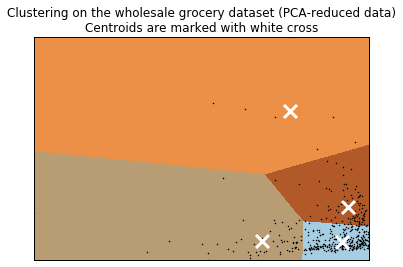

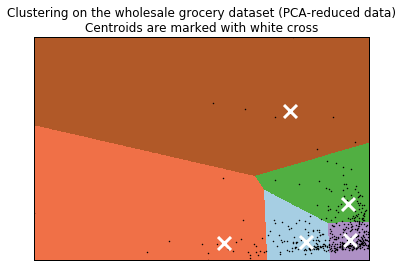

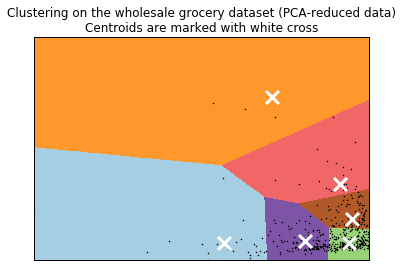

In [332]:
# Put the result into a color plot
def plotClusters(prediction, centroid):
    Z = prediction.reshape(xx.shape)
    #print clusters
    #print xx[0][0]
    plt.figure(1)
    plt.clf()

    #plots the color grids
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    #"""

    #plots the data  (use reduced_data)
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    #"""

    #plots the centroids in white crosses
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)

    #plots the title
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

 
plotClusters(Z, centroids)
plotClusters(Z4, centroids4)
plotClusters(Z5, centroids5)
plotClusters(Z6, centroids6)

#plotClusters(Z, centroidso)

In [333]:
# experiments
#Zo = pca.inverse_transform(clusters.cluster_centers_)
#plt.imshow(Zo, interpolation='nearest',
#               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
##               cmap=plt.cm.Paired,
#               aspect='auto', origin='lower')

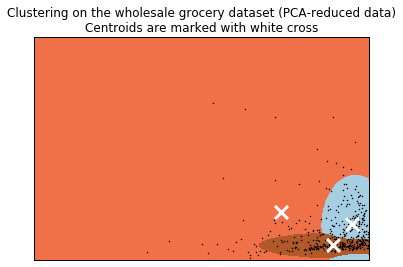

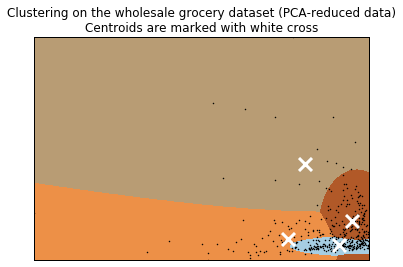

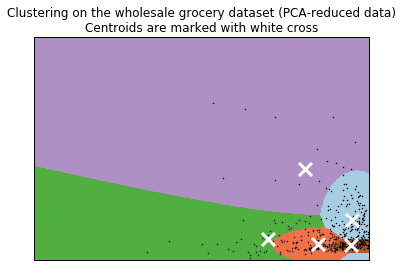

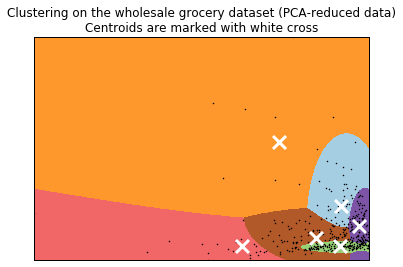

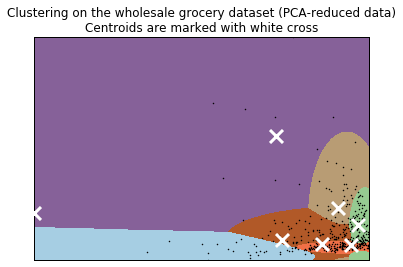

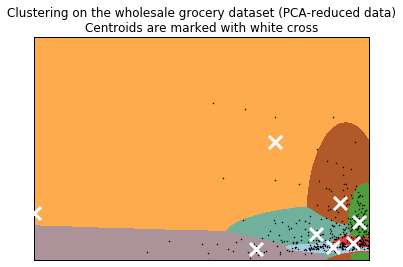

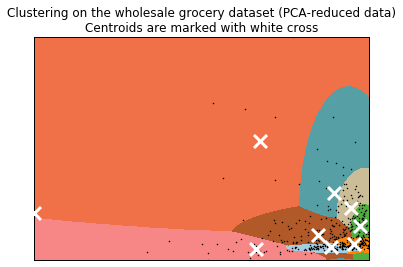

In [334]:
plotClusters(ZG, centroids_gmm)
plotClusters(ZG4, centroids4_gmm)
plotClusters(ZG5, centroids5_gmm)
plotClusters(ZG6, centroids6_gmm)
plotClusters(ZG7, centroids7_gmm)
plotClusters(ZG8, centroids8_gmm)
plotClusters(ZG9, centroids9_gmm)


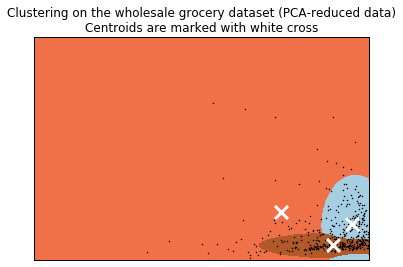

In [335]:
# Put the result into a color plot
Z_gmm = Z_gmm.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z_gmm, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

[[[ 36135.48457282   6480.2347537    6104.73878363   6844.02904962
     1116.07889738   2925.29532792]
  [  8322.69861907   3708.39600392   5342.26451174   2502.64602205
     1784.86331733   1068.7598276 ]
  [  7866.48334584  18810.88144467  27401.85716757   2389.52905546
    12224.37174037   2891.82145432]]]


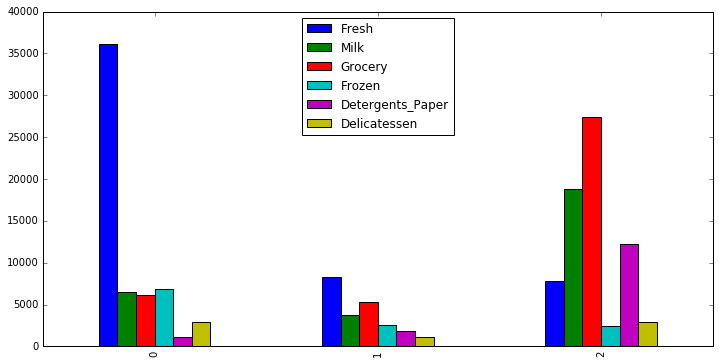

In [347]:
#print pca.inverse_transform([[4000,3000]])
#print pca.inverse_transform([[1339.44615464, 25546.49074629]])
#print pca.inverse_transform([[-24220.71188261,-4364.45560022]])

# using correct form of centroids to prevent hardcoding
print pca.inverse_transform([centroids])

pd.DataFrame(pca.inverse_transform(centroids), columns=data.columns).plot(kind = 'bar', figsize = (12, 6))

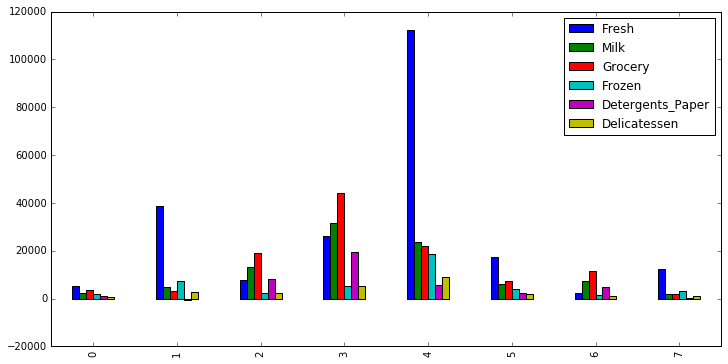

In [348]:
pd.DataFrame(pca.inverse_transform(centroids8_gmm), columns=data.columns).plot(kind = 'bar', figsize = (12, 6))

In [350]:

#dff = pd.DataFrame(pca.inverse_transform([centroids8_gmm[0]]))
#dff2 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[1]]))
#dff3 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[2]]))
#dff4 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[3]]))
#dff5 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[4]]))
#dff6 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[5]]))
#dff7 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[6]]))
#dff8 =pd.DataFrame(pca.inverse_transform([centroids8_gmm[7]]))

#frames = [dff, dff2, dff3, dff4, dff5, dff6, dff7, dff8]

# adding shortcut to generate table.  One line versus about ten lines.
result = pd.DataFrame(pca.inverse_transform(centroids8_gmm))
#result = pd.concat(frames)

result.index = range(8)
result.columns = ["Fresh","Milk", "Grocery","Frozen","Detergents_Paper","Delicatessen"]
result.head(8)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5223.397178,2163.787596,3456.714671,2022.285052,1008.656125,710.673035
1,38673.033742,4651.219280,3140.752144,7245.882222,-378.219653,2839.935731
2,7638.390703,13179.304354,19222.948850,2369.441548,8368.472609,2190.293594
3,26176.429097,31748.981330,44097.047527,5216.841005,19435.006155,5473.865382
4,112330.537474,23494.638332,21920.589895,18711.487095,5769.576356,9164.133902
5,17545.028912,5937.285355,7503.581730,3938.564470,2464.820251,1844.627427
6,2217.586260,7453.889857,11519.016830,1537.635703,4929.111672,1193.986974
7,12403.478068,1789.303959,2065.233044,3146.061392,85.561163,1056.571806


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

I feel that the PCA decomposition and plotting data helped easily visualize the data.  By doing PCA, we reduce the dimensions to simplify the problem.  We also throw away some of the more "useless information".  Also, by running the Kmeans algorithm helped easily group the clusters into segments.  Then I was able to compare the center of the cluster of data with the data closest to the center to see what characteristics did all those points have in common.  I also tested out the gmm but I seem to like the kmeans more because it was much simpler.  However, it looks to be better to choose gmm with 8 clusters to gain a much better insight into the data.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Update:  We can still apply this method below that I used for kmeans.  Except that this time we can use the data we received from the gmm.

Since this question refers to A/B testing.  Now that we are able to cluster the customers into their "like-ness" since we have already performed the PCA to reduce dimensions and conducted clustering on the data.  We can now present two different wholesale distributor options to see how each customer cluster will behave.

So, for each group of cluster, restaurants/grocery stores/retail warehouses.  We can offer two different test plans.

Plan A, we can have a cheaper bulk shipment.  
Plan B, we can have a more expensive less bulky shipment.  

So, half of the customers in each cluster we will give Plan A and the other half we will give Plan B.  Which ever plan has a higher percentage of favoritism or less complains, then we can choose that plan for that group.

For example, perhaps the retail warehouses prefer the buy in bulk plan shipped in the evening over the more expensive morning shipments.  But the restuarants might prefer to a less bulky more expensive early morning shipments.

See below on a method of how we can split our customers into three different test groups for us to experiment on.  Now, all we have to do is just see which subgroup A or B responds better within each group to a particular test which we want to do.

In [338]:
# below is only an example.  I can easily apply this to gmm

my_clusters = KMeans(n_clusters=3)
my_predict = my_clusters.fit_predict(reduced_data)

group1 = reduced_data[my_predict==0]
group2 = reduced_data[my_predict==1]
group3 = reduced_data[my_predict==2]

np.random.shuffle(group1)
np.random.shuffle(group2)
np.random.shuffle(group3)


In [339]:
group1A = group1[:(len(group1)/2)]
group1B = group1[(len(group1)/2):]


group2A = group1[:(len(group2)/2)]
group2B = group1[(len(group2)/2):]


group3A = group1[:(len(group3)/2)]
group3B = group1[(len(group3)/2):]

**10)** How would you use that data to help you predict future customer needs?

Answer: 

Update:  Again this section should not change even if I choose GMM, since I can just inject that data below.

Since this question is actually about using the clustering data in a supervised manner, we first already analyzed the data in the unsupervised manner which is the process of analyzing data without any labels.

We can give labels to each of these clusters. For example, we can label one cluster as restaurants.  Label another cluster as groceries.  And another cluster as retail warehouses.  So now, that we have already labeled our data.  This becomes a supervised learning problem where we can make use of a classifier.

We can choose something simple like a nearest neighbor classifier or a decision tree classifier.  So now, depending on what features new customers possess we can say oh, this guy is probably a restaurant.  And if he is a restaurant then maybe he'll prefer plan B.  Or we might find that depending on different features it might be a person who is in the retail sector so therefore he might prefer plan A.

See below for an example of a possible implementation:



In [342]:
# fitting a knn classifier to our cluster data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(reduced_data, my_predict)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [343]:
# using a sample data point to predict which class it is in 0,1, or 2
# class 0 refers to what I believe might be the retail stores
# class 1 refers to what I believe might be the grocery stores
# class 2 refers to what I believe might be the cafe/restaurant

sample_data =  [3000, 14070, 20460, 25000, 10000, 10100]

# to get rid of the annoying 1d array depreciation error
sd = np.array(sample_data).reshape(1,(len(sample_data)))

samp_data = pca.transform(sd)
print samp_data

print(knn.predict(samp_data))

#test = [[4000, 3000]]  #in class 0
#test =[[1339.44615464,  25546.49074629]]  #in class 1
#test =[[-24220.71188261,  -4364.45560022]]  #in class 2
#print(knn.predict(test))

[[  3141.83256882  17507.06116213]]
[1]
